In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
X = 2 * np.random.rand(100,1)
X

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304],
       [1.58345008],
       [1.05778984],
       [1.13608912],
       [1.85119328],
       [0.14207212],
       [0.1742586 ],
       [0.04043679],
       [1.66523969],
       [1.5563135 ],
       [1.7400243 ],
       [1.95723668],
       [1.59831713],
       [0.92295872],
       [1.56105835],
       [0.23654885],
       [1.27984204],
       [0.28670657],
       [1.88933783],
       [1.04369664],
       [0.82932388],
       [0.52911122],
       [1.54846738],
       [0.91230066],
       [1.1368679 ],
       [0.0375796 ],
       [1.23527099],
       [1.22419145],
       [1.23386799],
       [1.88749616],
       [1.3636406 ],
       [0.7190158 ],
       [0.87406391],
       [1.39526239],
       [0.12045094],
       [1.33353343],
       [1.34127574],
       [0.42076512],
       [0.257

In [3]:
y = 6 + 4*X+np.random.randn(100,1)

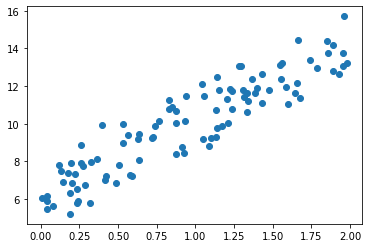

In [4]:
plt.scatter(X,y)

In [5]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [6]:
def get_weight_update(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X,w1.T) + w0
    diff = y - y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update, w0_update

In [7]:
def gradient_descent_steps(X,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1,w0,X,y,learning_rate=0.01)
        w1 -= w1_update
        w0 -= w0_update
    return w1,w0

In [8]:
w1, w0 = gradient_descent_steps(X,y,iters=1000)
w1,w0

(array([[4.02181364]]), array([[6.16203122]]))

In [9]:
y_pred = X*w1 + w0

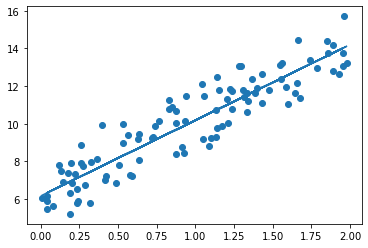

In [10]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [11]:
def stochastic_gradient_descent_steps(X,y,batch_size = 10, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_update(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 -= w1_update
        w0 -= w0_update
    
    return w1, w0

In [12]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
w1,w0

(array([[4.02826291]]), array([[6.15645891]]))

In [13]:
y_hat = X@w1 + w0
y_hat

array([[10.57798907],
       [11.9184005 ],
       [11.01263761],
       [10.54632434],
       [ 9.56964474],
       [11.36012151],
       [ 9.68189157],
       [13.34105111],
       [13.92023282],
       [ 9.2456654 ],
       [12.53501212],
       [10.41751448],
       [10.73292458],
       [13.61355212],
       [ 6.72876275],
       [ 6.85841836],
       [ 6.31934895],
       [12.86448219],
       [12.42569886],
       [13.16573424],
       [14.04072285],
       [12.59490051],
       [ 9.8743793 ],
       [12.44481237],
       [ 7.10933987],
       [11.31199914],
       [ 7.31138837],
       [13.76720843],
       [10.36074339],
       [ 9.49719353],
       [ 8.28785803],
       [12.39409262],
       [ 9.83144584],
       [10.73606169],
       [ 6.30783942],
       [11.13245524],
       [11.0878239 ],
       [11.12680358],
       [13.75978967],
       [11.64956175],
       [ 9.05284359],
       [ 9.67741813],
       [11.77694265],
       [ 6.64166698],
       [11.52828217],
       [11